Stats701 Homework 7  
Written By: David Li

In [12]:
# Prelims
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import string as st
import matplotlib.pyplot as plt
%matplotlib notebook

Part 1: Warmup on Constructing pandas objects  
Time Taken: 30 minutes

Question 1: Alphabet and Values

In [2]:
def primes(): # Prime numbers generator taken from my Homework 5
    counter = 2 # First prime number
    while True:
        switch = True
        for divisor in range(2, counter):
            if (counter % divisor == 0): # If we find a number to evenly divide into except 2 and the number itself, this number is out of consideration
                switch = False
                break
        if switch == True: # Otherwise yield the number
            yield counter
        counter = counter + 1

# Generate first 10 primes
test = primes()
firstprimes = [next(test) for _ in range(10)] # Expecting 2, 3, 5, 7, 11, 13, 17, 19, 23, 29
print(firstprimes)

# Generate first 10 indices
indices = list(st.ascii_lowercase[:10])
print(indices)

# Put it all together to create the pandas series
object1 = pd.Series(firstprimes, index = indices)
print(object1)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64


Question 2: Genetics Experiment Example

In [3]:
# First create the columns
animal = ['goat', 'goat', 'goat', 'goat', 'bird', 'bird', 'bird', 'bird', 'llama', 'llama', 'llama', 'llama']
parent1 = ['A', 'A', 'a', 'a', 'A', 'A', 'a', 'a', 'A', 'A', 'a', 'a']
parent2 = ['A', 'a', 'A', 'a', 'A', 'a', 'A', 'a', 'A', 'a', 'A', 'a']
score1 = list(range(1, 13))
score2 = [2, 4, 4, 6, 6, 8, 8, 10, 10, 12, 12, 14]

# Specify the columns to be used as indexes
indexdf = pd.DataFrame({"animal": animal, "parent1": parent1, "parent2": parent2})

# Specify the "real" values 
scores = pd.DataFrame({
    "score1": score1,
    "score2": score2
})
# Create a multi-index pandas DataFrame (at least that's what it looks like in the specs)
scores.index = pd.MultiIndex.from_arrays(indexdf.values.T, names = ('animal', 'parent1', 'parent2'))
print(scores)

                        score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14


Part 2: Working with pandas DataFrames  
Time Taken: 2 hours

Question 1: Download iris dataset and small summary

In [4]:
# Import the iris dataset from the link
iris = pd.read_csv("~/Desktop/School/Stats701/Homework7/iris.csv")

# View a bit of the dataset
print(iris.head())
print("")

# How many data points are there in this Data Set?
print("[How many data points are there in this Data Set?]")
print(iris.shape[0])
print("")

# What are the data types of the columns?
print("[What are the data types of the columns?]")
print("Looks like 4 columns of float64 datatype, and 1 column of object datatype (See .info output below)")
print("")
iris.info(verbose = False)
print("")

# What are the column names?
print("[What are the column names?]")
print("Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species (from .head() output)")
print("")

# How many species of flower are included in the Data?
print("[How many species of flower are included in the Data?]")
print(iris['Species'].nunique()) # Number of unique species in the species column


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

[How many data points are there in this Data Set?]
150

[What are the data types of the columns?]
Looks like 4 columns of float64 datatype, and 1 column of object datatype (See .info output below)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 5 entries, Sepal.Length to Species
dtypes: float64(4), object(1)
memory usage: 5.9+ KB

[What are the column names?]
Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species (from .head() output)

[How many species of flower are included in the Data?]
3


Question 2: Error corrections

In [5]:
# We need to modify values
print("Incorrect Rows")
# Row 34, 0 index.
print(iris[34:35])
# Row 37, 0 index.
print(iris[37:38])
print("")

# Modifying iris DataFrame with correct values
iris.at[34, 'Petal.Width'] = 0.2
iris.at[37, 'Sepal.Width'] = 3.6
iris.at[37, 'Petal.Length'] = 1.4

# Correction & Checking output
print("Corrected Rows")
print(iris[34:35]) # Should be [4.9, 3.1, 1.5, 0.2]
print(iris[37:38]) # Should be [4.9, 3.6, 1.4, 0.1]

Incorrect Rows
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
34           4.9          3.1           1.5          0.1  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
37           4.9          3.1           1.5          0.1  setosa

Corrected Rows
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
34           4.9          3.1           1.5          0.2  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
37           4.9          3.6           1.4          0.1  setosa


Question 3: Adding columns Petal.Ratio & Sepal.Ratio

In [6]:
iris['Petal.Ratio'] = ((iris['Petal.Length']) / (iris['Petal.Width']))
iris['Sepal.Ratio'] = ((iris['Sepal.Length']) / (iris['Sepal.Width']))
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  Petal.Ratio  \
0           5.1          3.5           1.4          0.2  setosa          7.0   
1           4.9          3.0           1.4          0.2  setosa          7.0   
2           4.7          3.2           1.3          0.2  setosa          6.5   
3           4.6          3.1           1.5          0.2  setosa          7.5   
4           5.0          3.6           1.4          0.2  setosa          7.0   

   Sepal.Ratio  
0     1.457143  
1     1.633333  
2     1.468750  
3     1.483871  
4     1.388889  


Question 4: Saving to a new .csv

In [7]:
iris.to_csv("~/Desktop/School/Stats701/Homework7/iris_corrected.csv")

Question 5: Aggregation of summary statistics

In [8]:
iris.groupby(['Species']).agg({'Petal.Ratio': ['mean', 'median', 'min', 'max', 'std'], 'Sepal.Ratio': ['mean', 'median', 'min', 'max', 'std']})

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

Part 3: Plotting pandas DataFrames  
Time Taken: 1.5 Hours

Question 1: Box and Whisker Plot

True


<IPython.core.display.Javascript object>


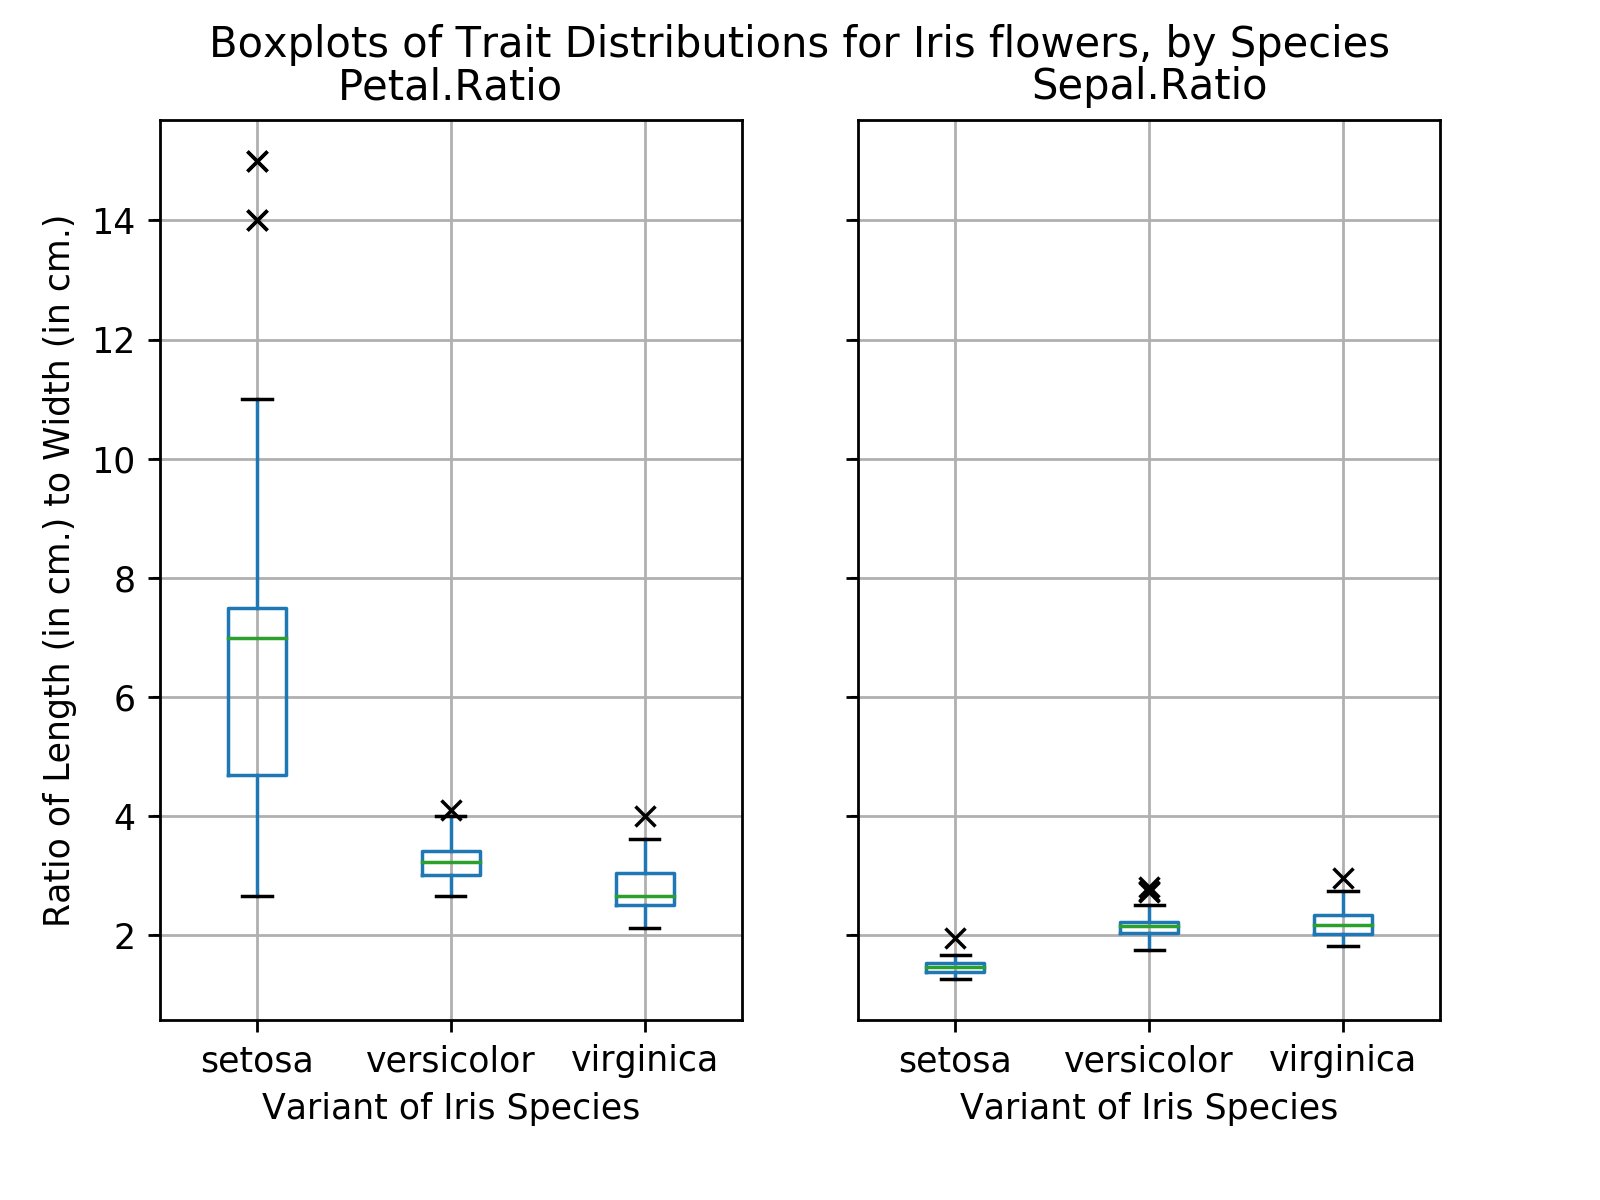

In [13]:
# Check iris is still a pandas.DataFrame type, so the plot command will actually utilize the pandas plotting tools
print(isinstance(iris, pd.DataFrame)) # Should be True

# Create the boxplot
ax = iris.boxplot(column = ['Petal.Ratio', 'Sepal.Ratio'], by = ['Species'], sym = 'x')

# Set x axis labels
ax[0].set_xlabel('Variant of Iris Species')
ax[1].set_xlabel('Variant of Iris Species')

# Set y axis labels
ax[0].set_ylabel('Ratio of Length (in cm.) to Width (in cm.)')

# Add a title
plt.suptitle("Boxplots of Trait Distributions for Iris flowers, by Species")

plt.show()



Question 2: Scatter Matrix Plot

<IPython.core.display.Javascript object>


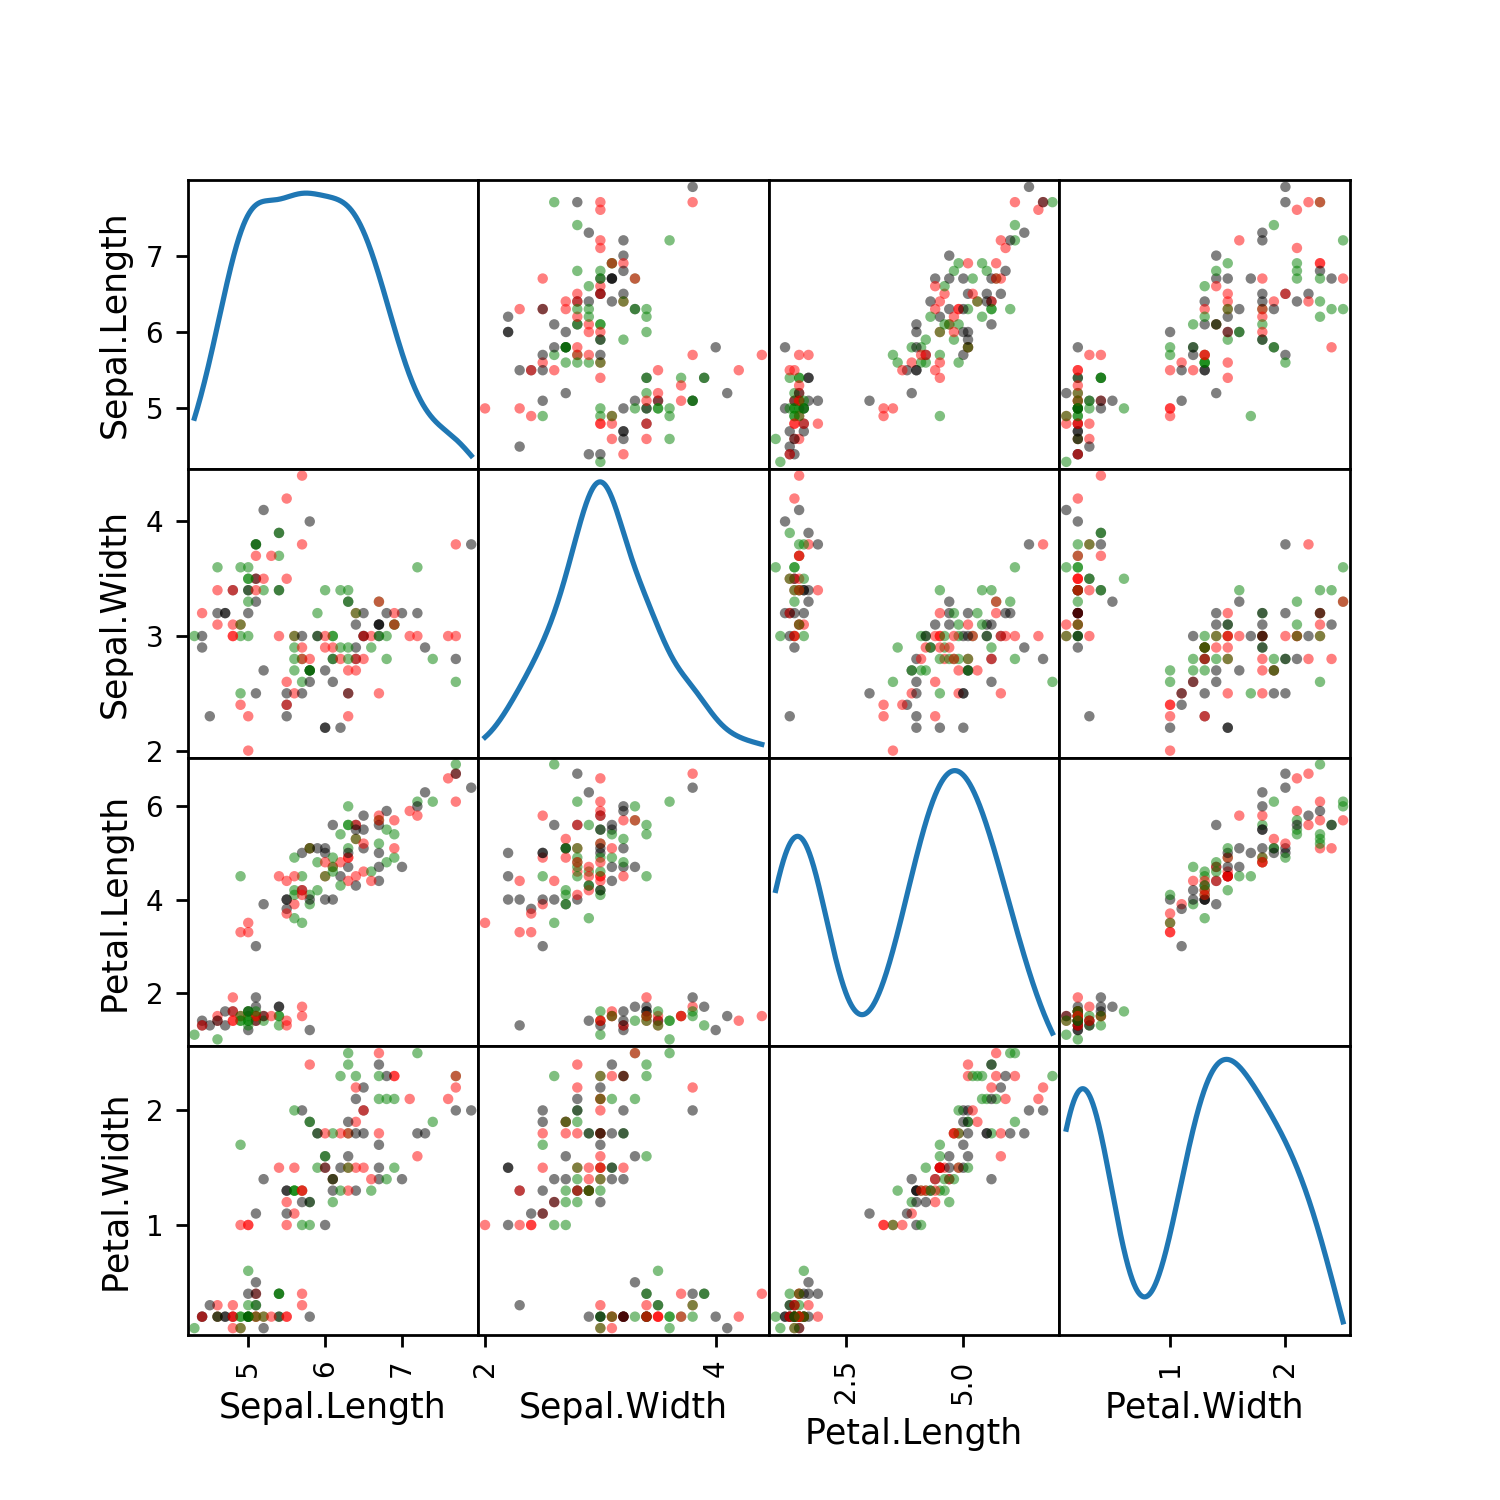

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4226d5d0f0>,
      dtype=object)

In [14]:
# Subsetting the iris set into a dataframe containing just the 4 desired measurements
iris2 = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']].copy()

# Create Scatter Matrix, with color differentiation by Species
scatter_matrix(iris2, figsize=(6, 6), diagonal='kde', color = ['red', 'green', 'black'])